## Installation de pytorch

## Importation de yolov5

In [ ]:
!cd yolov5 & pip install -r requirements.txt # Installation des dépendances via le fichier requirements.txt

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl.metadata (2.7 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inference-gpu 0.26.1 requires requests<=2.31.0, but you have requests 2.32.3 which is incompatible.


In [7]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
import time

## Load model

In [ ]:
model = torch.hub.load('ultralytics/yolov5','yolov5s') # Model YOLOv5s to detect objects

Using cache found in C:\Users\mathi/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-11-6 Python-3.11.10 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 8188MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [4]:
print(model)

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

## Make detections

(1160, 770, 4)


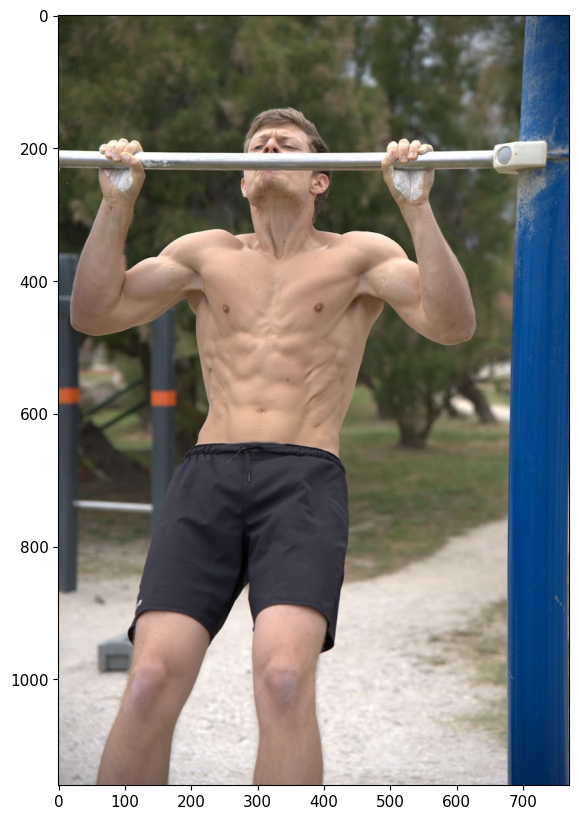

In [ ]:
img = Image.open(r"C:\Users\mathi\Pictures\Screenshots\Capture d'écran 2024-11-13 203757.png") # Open the image via PIL
img = np.asarray(img) # Convertion de l'image en array numpy
print(np.shape(img))
%matplotlib inline
plt.figure(figsize=(10,10)) # Plot
plt.imshow(img)
plt.show()

In [6]:
print(torch.__version__)

2.5.1


In [ ]:
result = model(img) # Détection des objets dans l'image via le modèle YOLOv5
print(result)

C:\Users\mathi/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


image 1/1: 1160x770 1 person, 1 baseball bat
Speed: 11.8ms pre-process, 35.9ms inference, 122.7ms NMS per image at shape (1, 3, 640, 448)


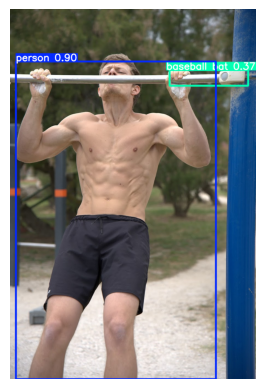

In [14]:
%matplotlib inline
plt.imshow(np.squeeze(result.render())) # Plot l'image avec les résultats de la détection
plt.axis('off')
plt.show()

## Real time detection with webcam

In [16]:
cap = cv2.VideoCapture(0) # Capture vidéo via la webcam
while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)
    cv2.imshow('Yolo detection', np.squeeze(results.render())) # Affichage de la frame et de la détection des objets (bbox)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\mathi/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\mathi/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\mathi/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\mathi/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\mathi/.cache\torch\hub\ultralytics_yolov5_master\models

## Fine tuning YOLOv5 pour lethal company

In [21]:
!git clone https://github.com/HumanSignal/labelImg

Cloning into 'labelImg'...


In [22]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ------ --------------------------------- 1.0/6.9 MB 10.1 MB/s eta 0:00:01
   ------------------------------ --------- 5.2/6.9 MB 16.8 MB/s eta 0:00:01
   ---------------------------------------- 6.9/6.9 MB 18.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 3.8/3.8 MB 22.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/50.1 MB ? eta -:--:--
   ---- ----------------------------------- 6.0/50.1 MB 30.8 MB/s eta 0:00:02
   --------- ------------------------------ 12.1/50.1 MB 30.2 MB/s eta 0:00:02
   -------------- ------------------------- 17.8/50.1 MB 30.4 MB/s eta 0:00:02
   ------------------- -------------------- 24.4/50.1 MB 29.7 MB/s eta 0:00:01
   ----------------------- ---------------- 29.9/50.1 MB 29.2 MB/s eta 0:00:01
   ---------------------------- ----------- 35.4/50.1 MB 28.5 MB/s eta 0:00:01
   --------

In [32]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-397-gde62f93c Python-3.11.10 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 8188MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.

## Tester le modele

In [3]:
model = torch.hub.load('ultralytics/yolov5','custom', path='yolov5/runs/train/exp4/weights/last.pt', force_reload=True) # On load le modèle fine-tuné

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\mathi/.cache\torch\hub\master.zip
YOLOv5  2025-1-24 Python-3.11.10 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 8188MiB)

Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [ ]:
vid_test = r"C:\Users\mathi\Videos\lethal_2.mp4" # Chemin de la vidéo à tester
cap = cv2.VideoCapture(vid_test)
while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)
    cv2.imshow('Yolo detection', np.squeeze(results.render()))
    time.sleep(0)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\mathi/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\mathi/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\mathi/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\mathi/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\mathi/.cache\torch\hub\ultralytics_yolov5_master\models